In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import arviz as az
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pystan
%load_ext jupyterstan

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
STAN_MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "stan_models")
STAN_DATA_PATH = os.path.join(PROJECT_ROOT_DIR,'data')

from stan_utils import *

import matplotlib.lines as mlines

from matplotlib import rcParams
# from bokeh.io import output_notebook, show, export_png
# output_notebook()

In [56]:
# from bokeh.layouts import gridplot, column


In [25]:
az.style.use("arviz-white")

In [ ]:
# configure visual properties on a plot's title attribute
p.title.text = "Title With Options"
p.title.align = "right"
p.title.text_color = "orange"
p.title.text_font_size = "25px"
p.title.background_fill_color = "#aaaaee"

## 载入数据

In [109]:
prior = az.from_netcdf('prior_data2.nc')
data1 = az.from_netcdf('experement_1.nc')
data2 = az.from_netcdf('experement_2.nc')
data3 = az.from_netcdf('experement_3.nc')
data4 = az.from_netcdf('experement_4.nc')

## 1.产生接收信号强度空间图片（有阴影效应，无阴影效应）

In [10]:
data_8groups = StanData_load("data_16groups")
data_8groups.keys()

Using cached StanDATA: data_16groups


dict_keys(['trans_data', 'recv_data_free_loss', 'true_recv_power', 'sensored_power'])

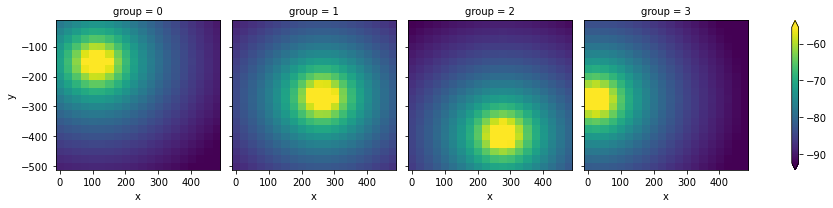

In [11]:
data_8groups['recv_data_free_loss'][0:4,:,:].plot.imshow(col='group',robust=True)
# save_fig('no_shdow_fading', tight_layout=False)

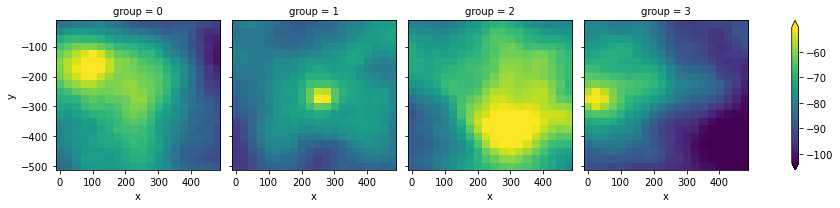

In [12]:
data_8groups['sensored_power'][0:4,:,:].plot.imshow(col='group',robust=True)
# save_fig('shdow_fading', tight_layout=False)

## 2.MCMC算法诊断

In [15]:
posterior_20groups = az.from_netcdf('experement_2.nc')

In [29]:
print('\u03B5')

ε


In [ ]:
trace_plot = az.plot_trace(data3, backend='bokeh',legend=True,figsize=(16, 12), show=False, backend_kwargs={'output_backend':"svg"} )
trace_plot[0][0].title.text = "γ, density"
trace_plot[0][1].title.text = "γ, trace"
trace_plot[1][0].title.text = "φ, density"
trace_plot[1][1].title.text = "φ, trace"
trace_plot[2][0].title.text = "σ, density"
trace_plot[2][1].title.text = "σ, trace"
trace_plot[3][0].title.text = "σₑ, density"
trace_plot[3][1].title.text = "σₑ, trace"
for i in range(4):
    for j in range(2):        
        trace_plot[i][j].title.text_font_size = '18px'

trace_pic = gridplot(trace_plot.tolist())
show(trace_pic)

In [ ]:
# fig1, f1_axes = plt.subplots(ncols=2, nrows=4, constrained_layout=True, figsize=(18, 12))
rcParams["legend.loc"] = 'upper right'
rcParams['legend.frameon'] = True 
trace_plot = az.plot_trace(data3,  legend=True, chain_prop=('color', ['r','b', 'c','y']), figsize=(12, 10) )
trace_plot[0][0].set_title(r"$\gamma$, density")
trace_plot[0][1].set_title(r"$\gamma$, trace")
trace_plot[1][0].set_title(r"$\phi$, density")
trace_plot[1][1].set_title(r"$\phi$, trace")
trace_plot[2][0].set_title(r"$\sigma$, density")
trace_plot[2][1].set_title(r"$\sigma$, trace")
trace_plot[3][0].set_title(r"$\sigma_\epsilon$, density")
trace_plot[3][1].set_title(r"$\sigma_\epsilon$, trace")
save_fig('trace_plot', tight_layout=False)

Saving figure trace_plot


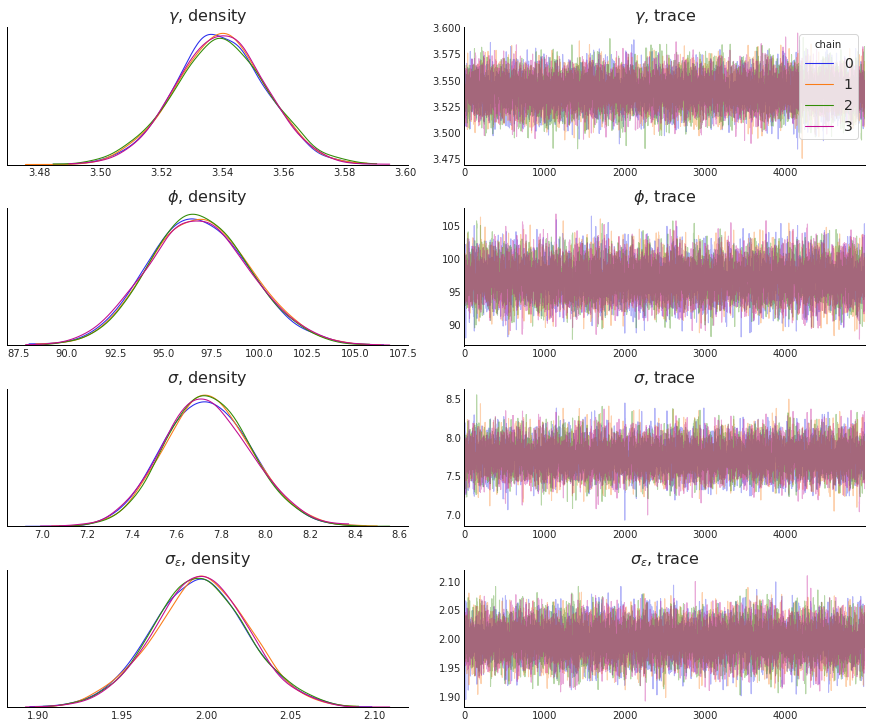

In [108]:

rcParams["legend.loc"] = 'upper right'
rcParams['legend.frameon'] = True 
trace_plot = az.plot_trace(data3,  legend=True, figsize=(12, 10) )
trace_plot[0][0].set_title(r"$\gamma$, density")
trace_plot[0][1].set_title(r"$\gamma$, trace")
trace_plot[1][0].set_title(r"$\phi$, density")
trace_plot[1][1].set_title(r"$\phi$, trace")
trace_plot[2][0].set_title(r"$\sigma$, density")
trace_plot[2][1].set_title(r"$\sigma$, trace")
trace_plot[3][0].set_title(r"$\sigma_\epsilon$, density")
trace_plot[3][1].set_title(r"$\sigma_\epsilon$, trace")
save_fig('trace_plot', tight_layout=False)

## 3. 对比不同数据量后的 后验分布情况

In [25]:
az.plot_density([prior],
    data_labels=[ "prior"],
    var_names=["gama", "fai", "sigma", "sigma_eta"],
    credible_interval = 1 ,
    hpd_markers= 'v',
    shade=0.1, backend="bokeh")

array([[Figure(id='14684', ...), Figure(id='14720', ...),
        Figure(id='14756', ...)],
       [Figure(id='14792', ...), None, None]], dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ea8eb7750>,
      dtype=object)

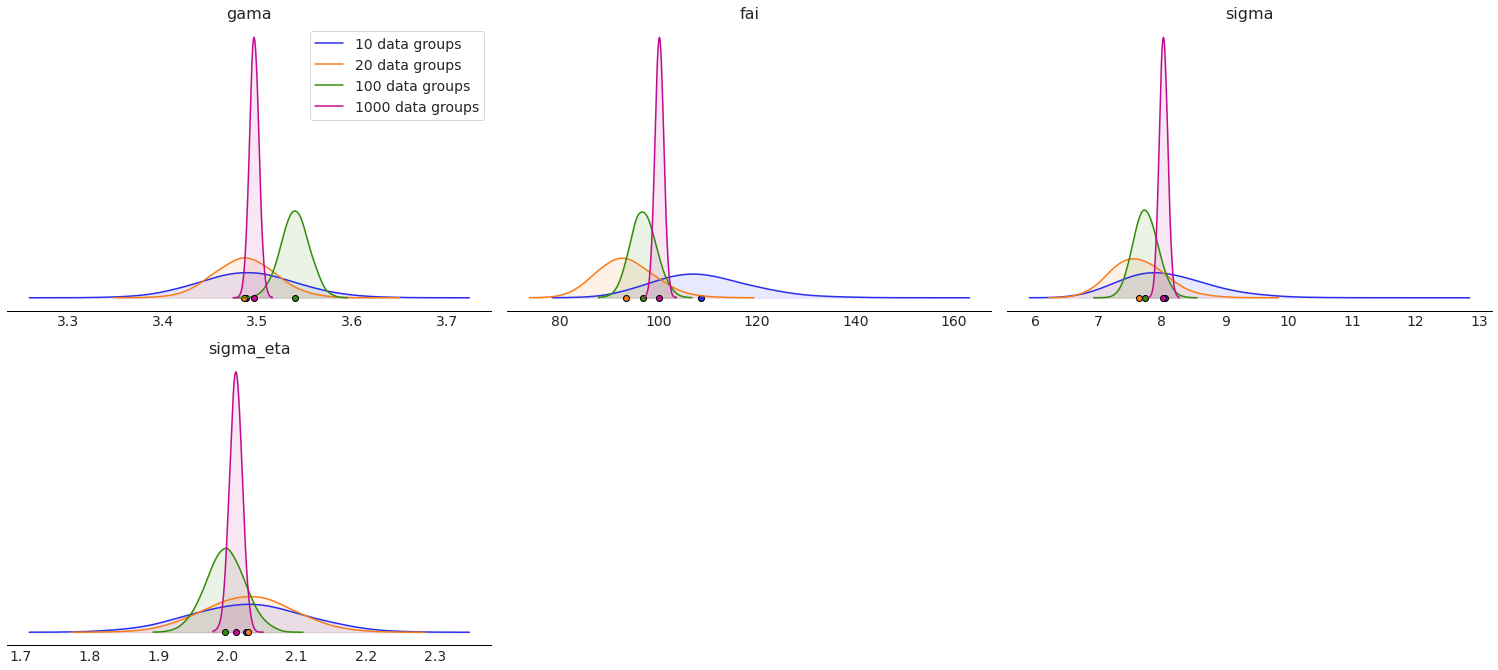

In [111]:
az.plot_density([data1, data2, data3, data4],
    data_labels=[ "10 data groups", "20 data groups", "100 data groups","1000 data groups"],
    var_names=["gama", "fai", "sigma", "sigma_eta"],
    credible_interval = 1 ,
    shade=0.1)

In [ ]:
# configure visual properties on a plot's title attribute
p.title.text = "Title With Options"
p.title.align = "right"
p.title.text_color = "orange"
p.title.text_font_size = "25px"
p.title.background_fill_color = "#aaaaee"

In [6]:
# 读取数据
prior_data = az.from_netcdf('prior_data.nc')
posterior_data = az.from_netcdf('experement_2.nc')

In [53]:
print('\u03b3')

γ


In [55]:
p1 = az.plot_posterior(prior_data, backend='bokeh', show=False)
p2 = az.plot_posterior(posterior_data, backend='bokeh', show=False)

p = np.concatenate((p1, p2))
p = p.T
p[0][0].title.text='γ, prior distribution'
p[0][1].title.text='γ, posterior distribution'
pic = gridplot(p.tolist())
show(pic)

In [40]:
p1 = az.plot_posterior(prior_data, backend='bokeh', show=False) # 多个图片对象figure放到numpy数组中返回
p1

array([[Figure(id='8465', ...), Figure(id='8501', ...),
        Figure(id='8537', ...), Figure(id='8573', ...)]], dtype=object)

In [ ]:
my_plot = az.plot_trace(postprior_data, backend='bokeh')

In [56]:
a = 1.0275

In [57]:
 a**10 + a**9 + a**8 + a**7 + a**6

6.216475453586938